In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from mpl_toolkits.mplot3d import Axes3D
# %matplotlib notebook

# A

In [2]:
color=np.array(['b','r','g','y'])

In [3]:
thr = 2
size = 50
def generate_points(dim,size):
    X = np.random.uniform(low=0,high=size,size=(3500*dim,dim))
    y = np.zeros(X.shape[0]).astype(int)
    k_mask = np.sum(np.square(size/2 - X[:]),axis=1) < np.square(size/2)
    edg = ((np.abs(X - size) < 5).sum(axis=1) + (X < 5).sum(axis=1)) >= dim - 1
    y[edg] = 3
    y[k_mask] = 1
    vertex = np.array(list(itertools.product([0,size],repeat=dim)))
    for v in vertex:
        y[(np.abs(X-v) < 5).all(axis=1)] = 2
    return X,y

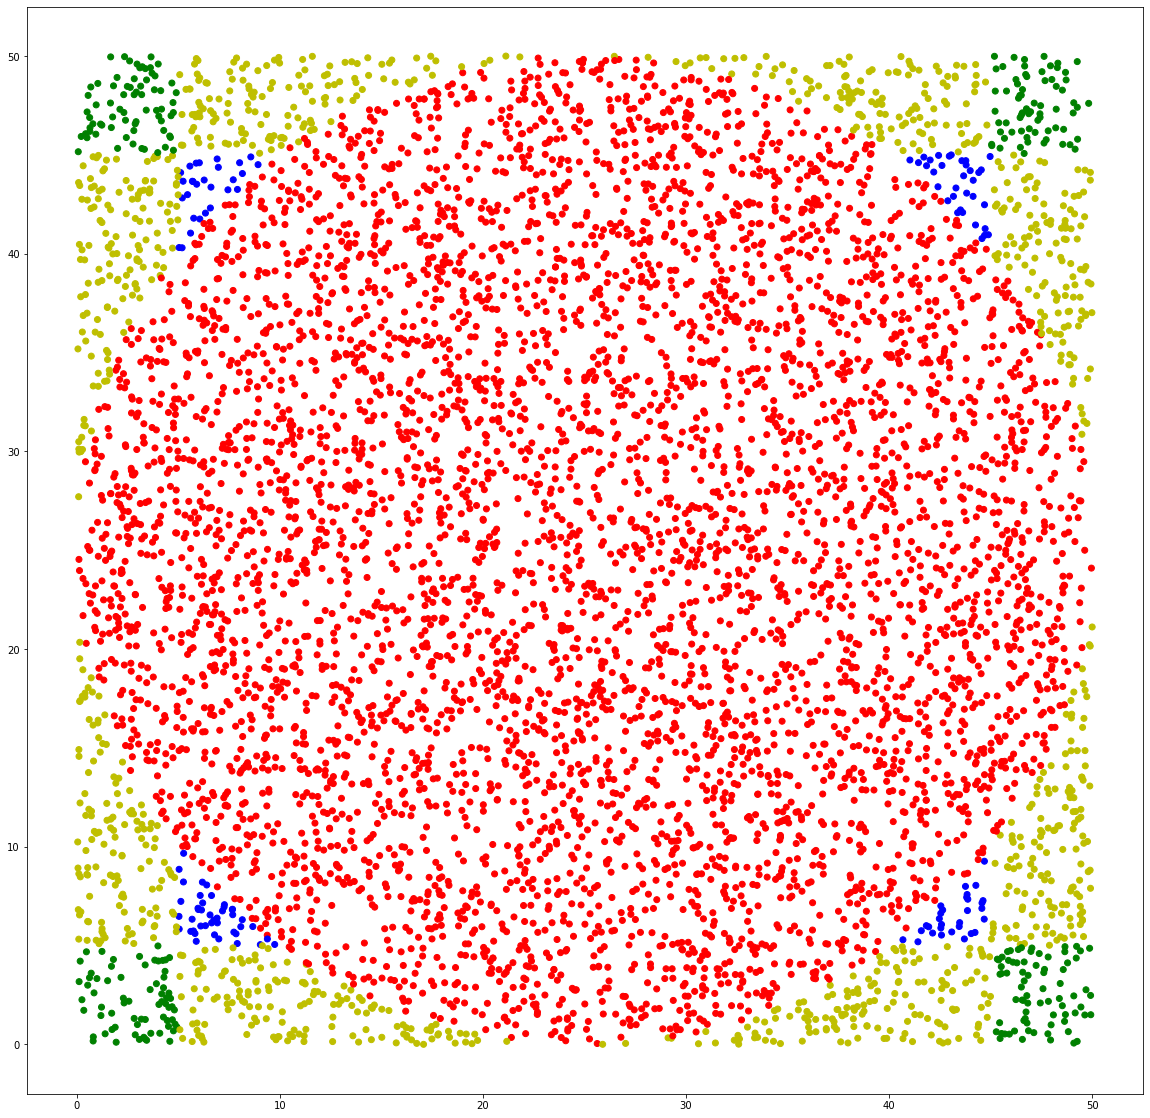

In [4]:
X,y = generate_points(2,50)
fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(X[:,0],X[:,1],c=color[y])

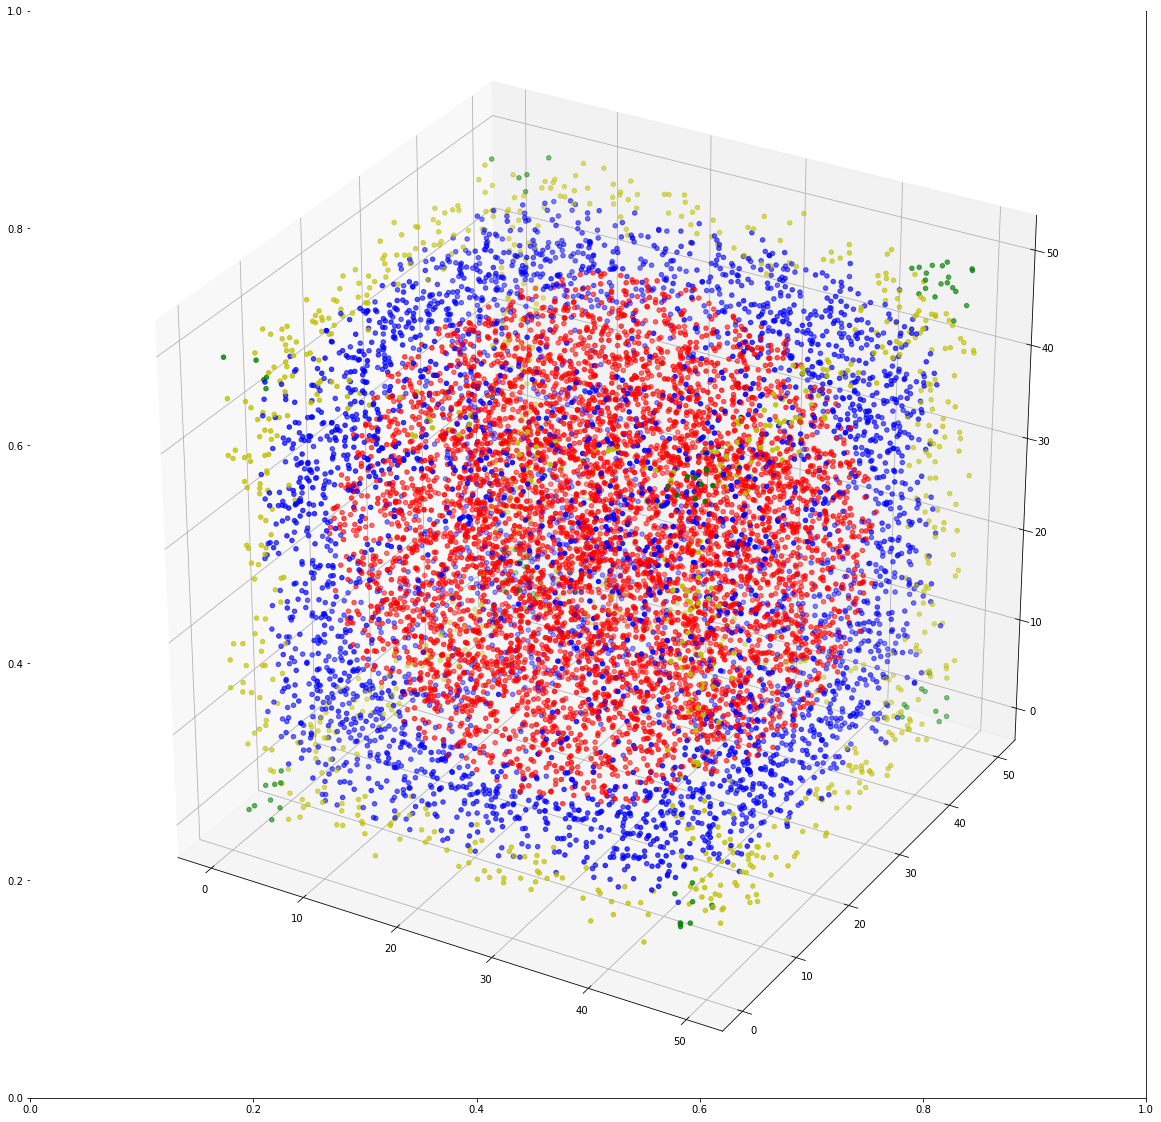

In [5]:
fig, ax = plt.subplots(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
X,y = generate_points(3,50)
ax.scatter(X[:,0],X[:,1],X[:,2],c=color[y])
plt.show()

Powyżej prezentacja działąnia generatora bez żadnych modyfikacji

In [6]:
dims = [2,3,4,5,7,13]

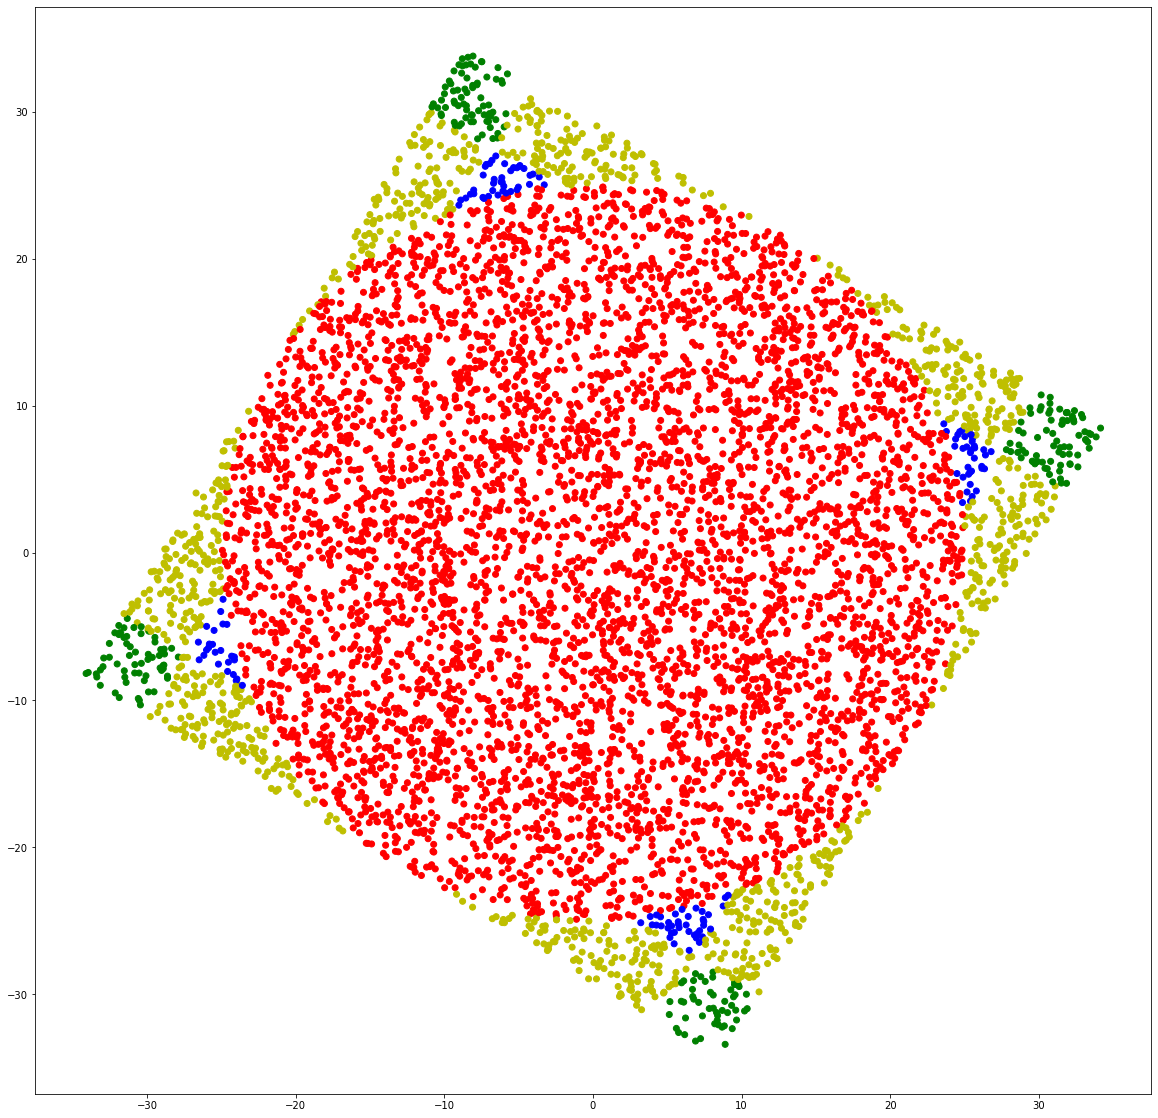

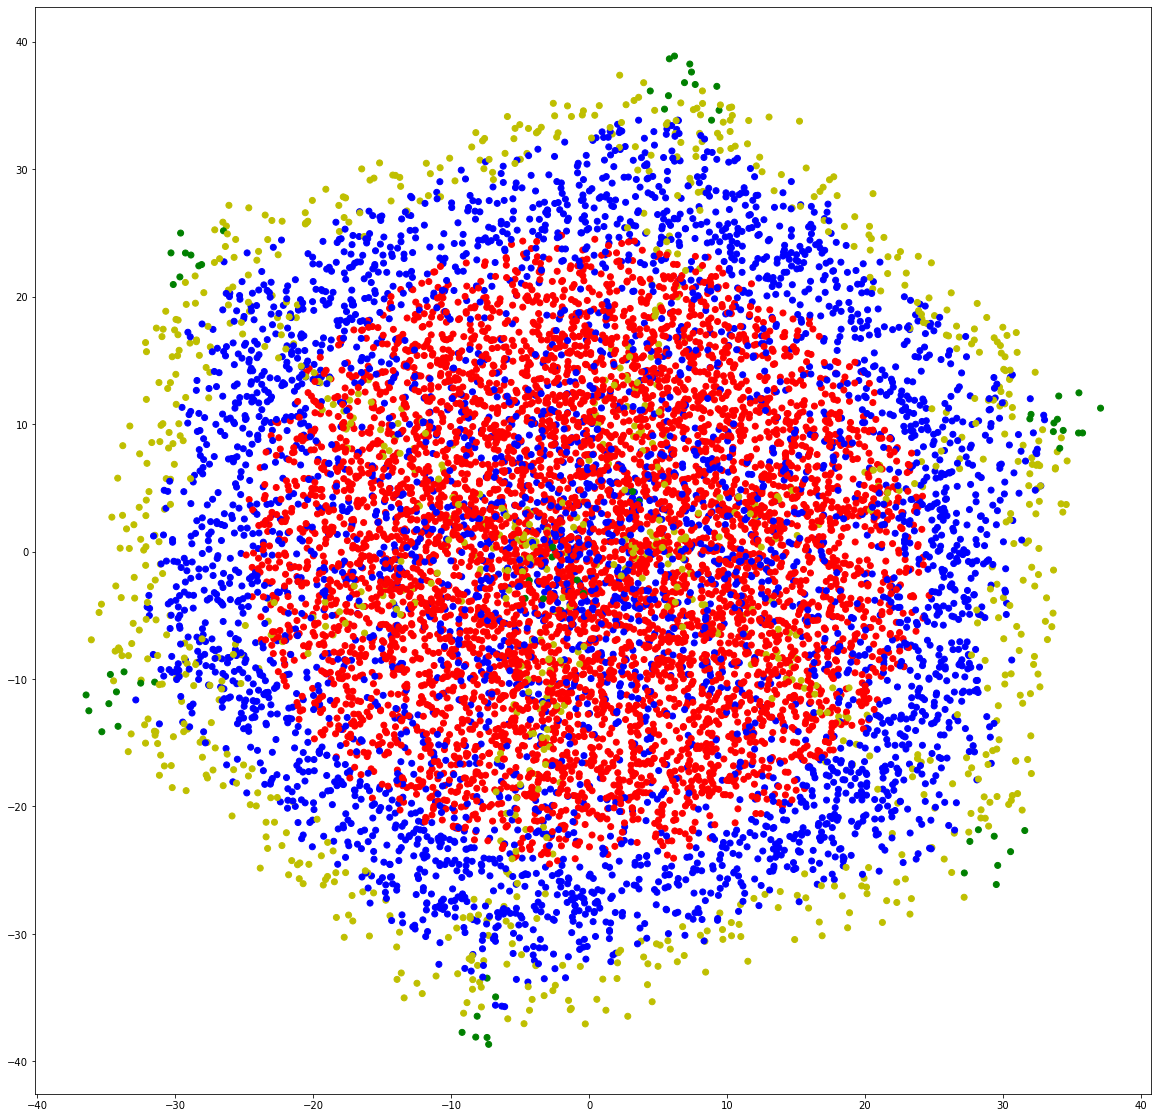

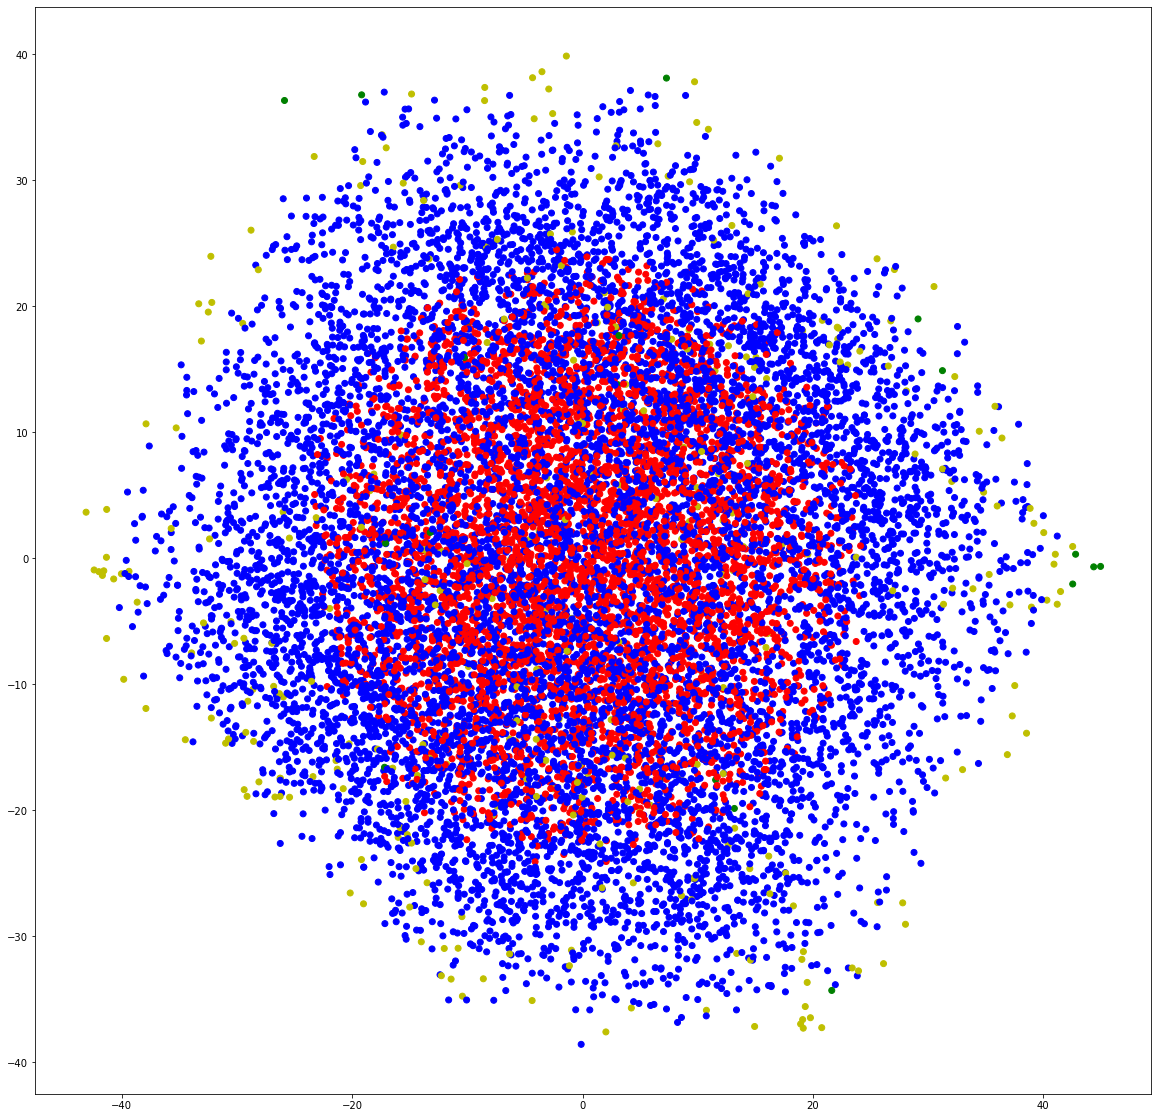

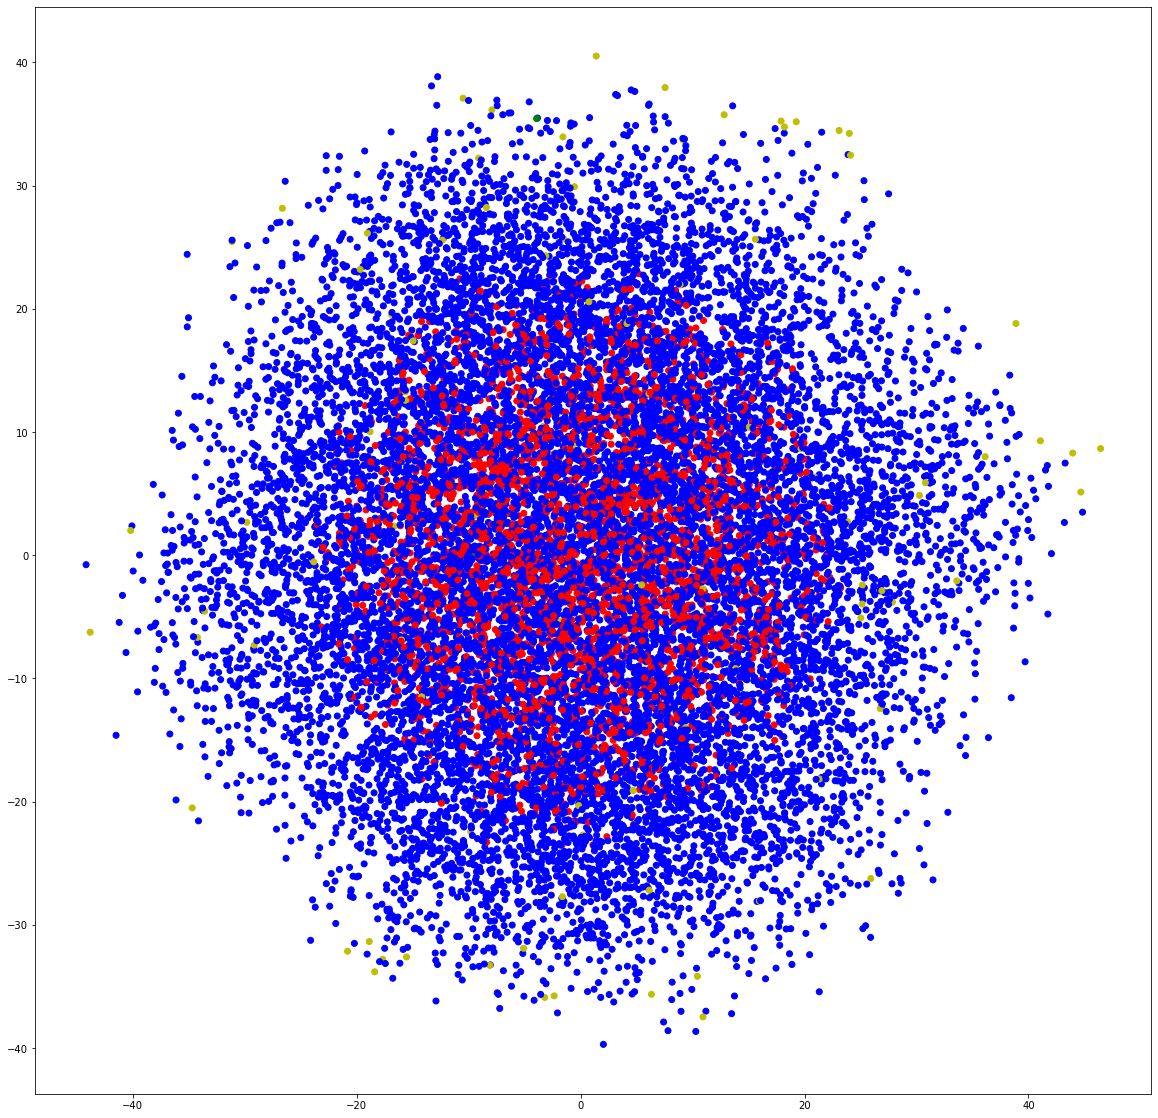

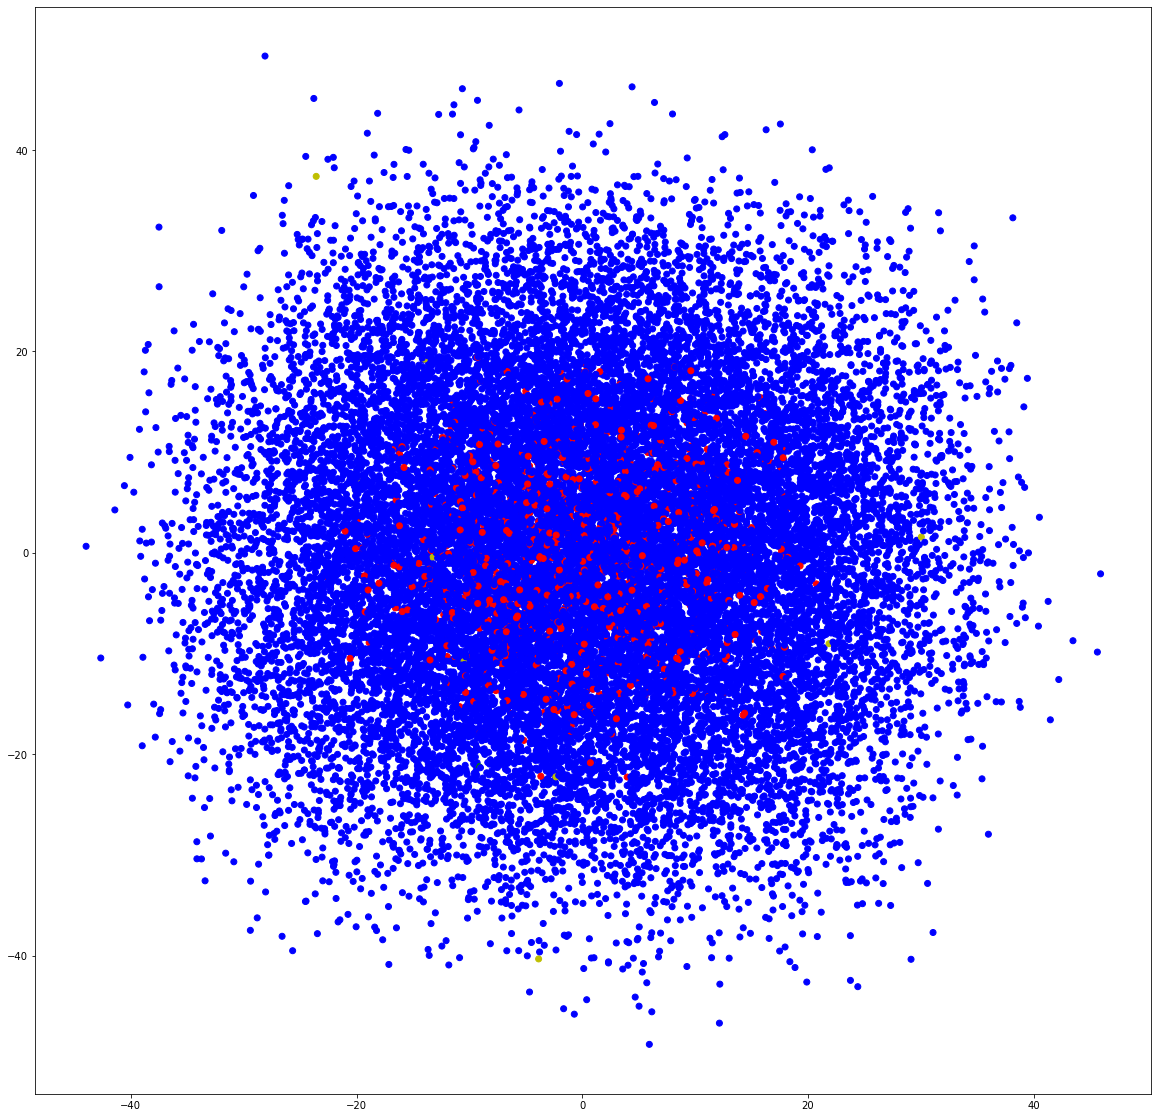

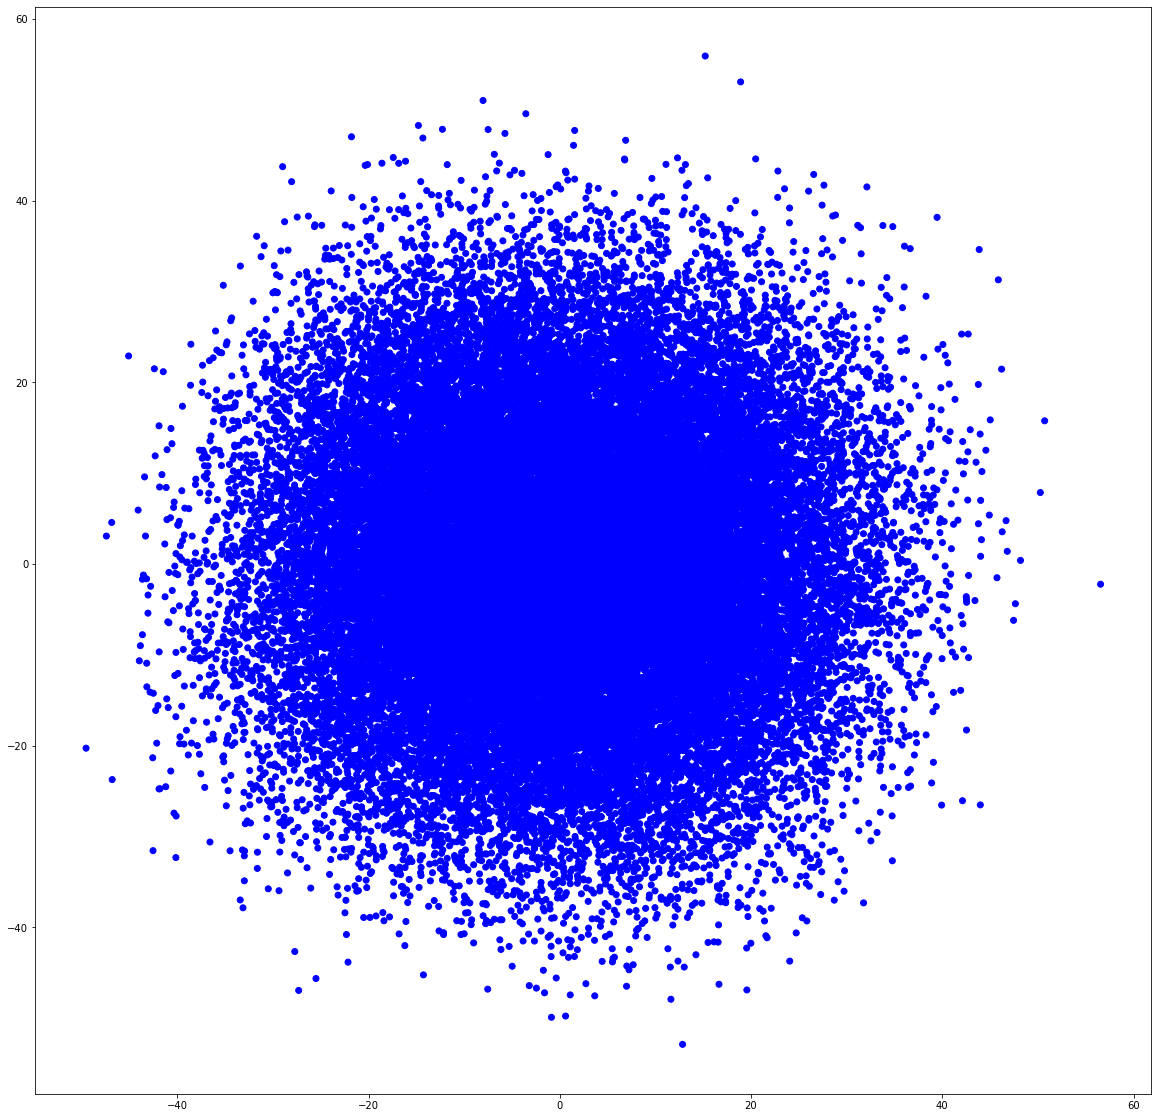

In [7]:
pca = PCA(n_components=2)
for d in dims:
    fig, ax = plt.subplots(figsize=(20,20))
    X,y = generate_points(d,50)
    pca.fit(X)
    X1 = pca.transform(X)
    ax.scatter(X1[:,0],X1[:,1],c=color[y])
    plt.show()

Można łatwo zauważyć żę wraz ze wzrostem wymiaru, za cień rzucany na pląszczyznę 2D coraz bardziej jest odpowiedzialne wnetrze hipersześcianu. Kula wewnątrz jak i inne detale zanikają.

In [8]:
dims = [3,4,5,7,13]

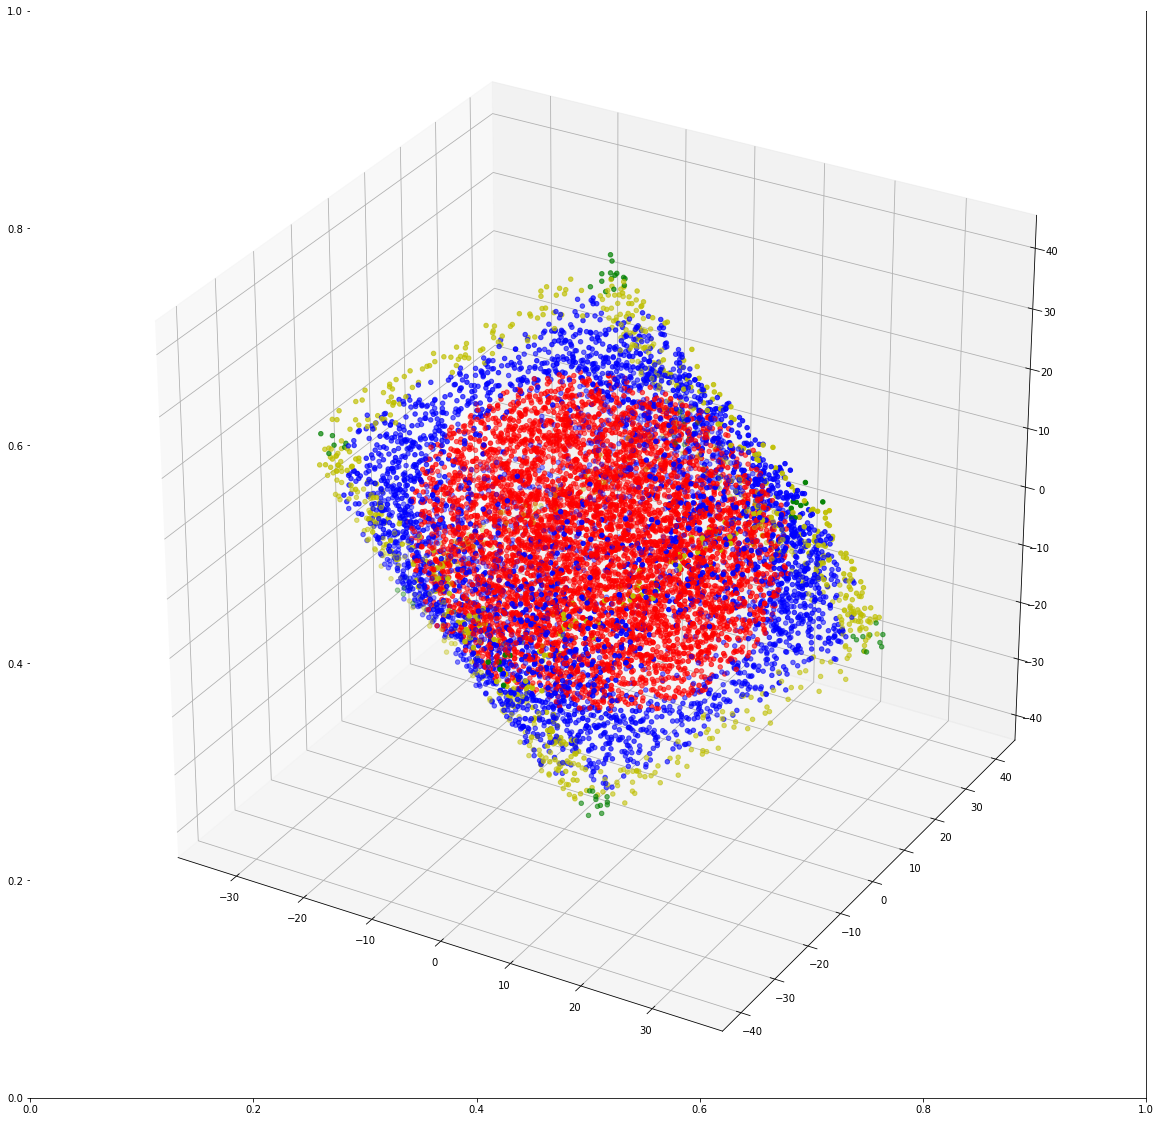

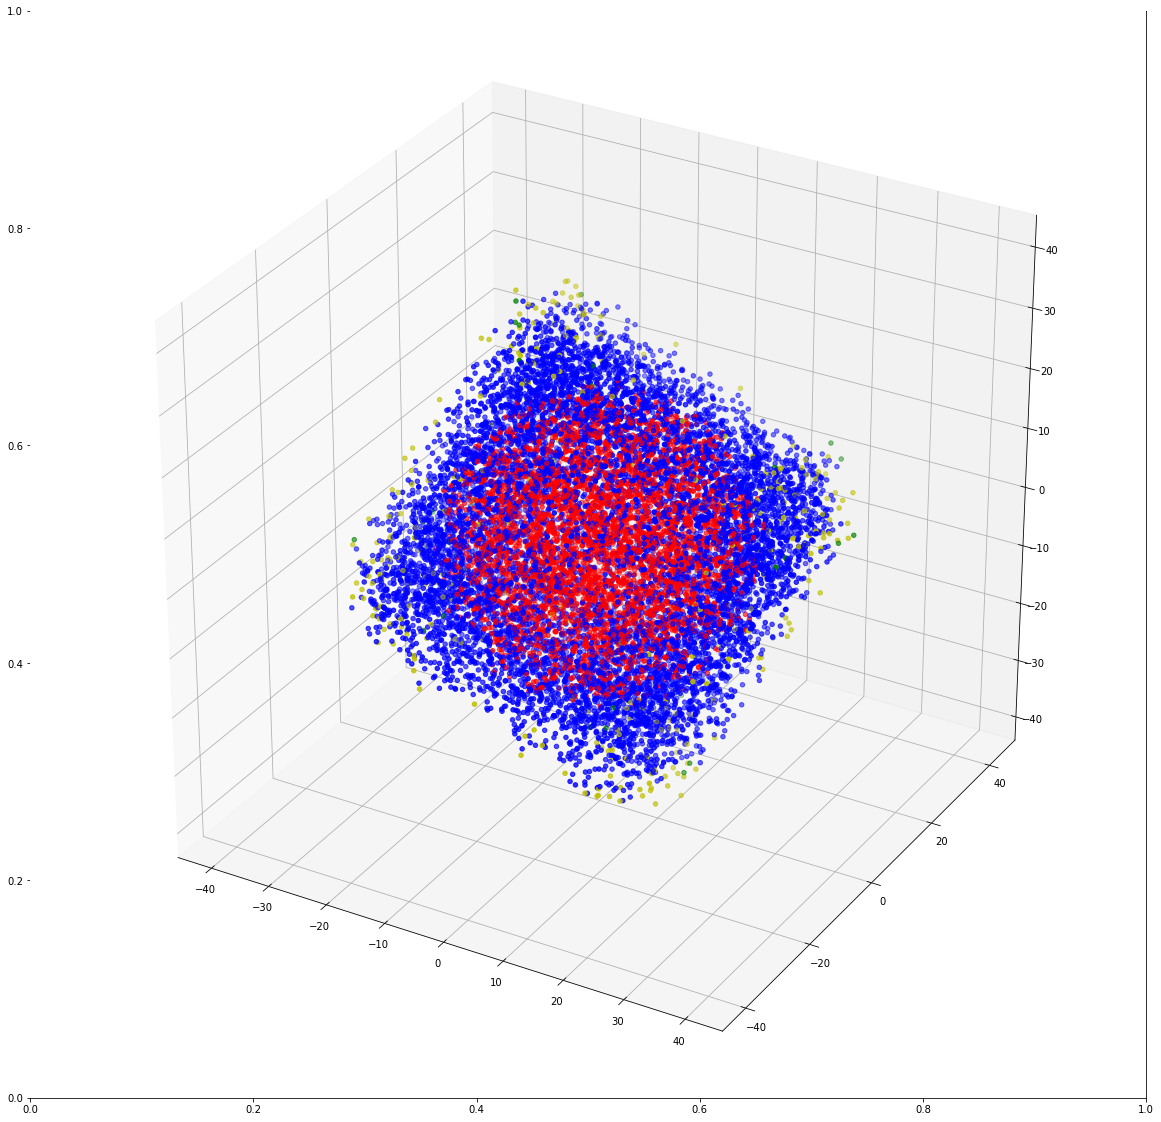

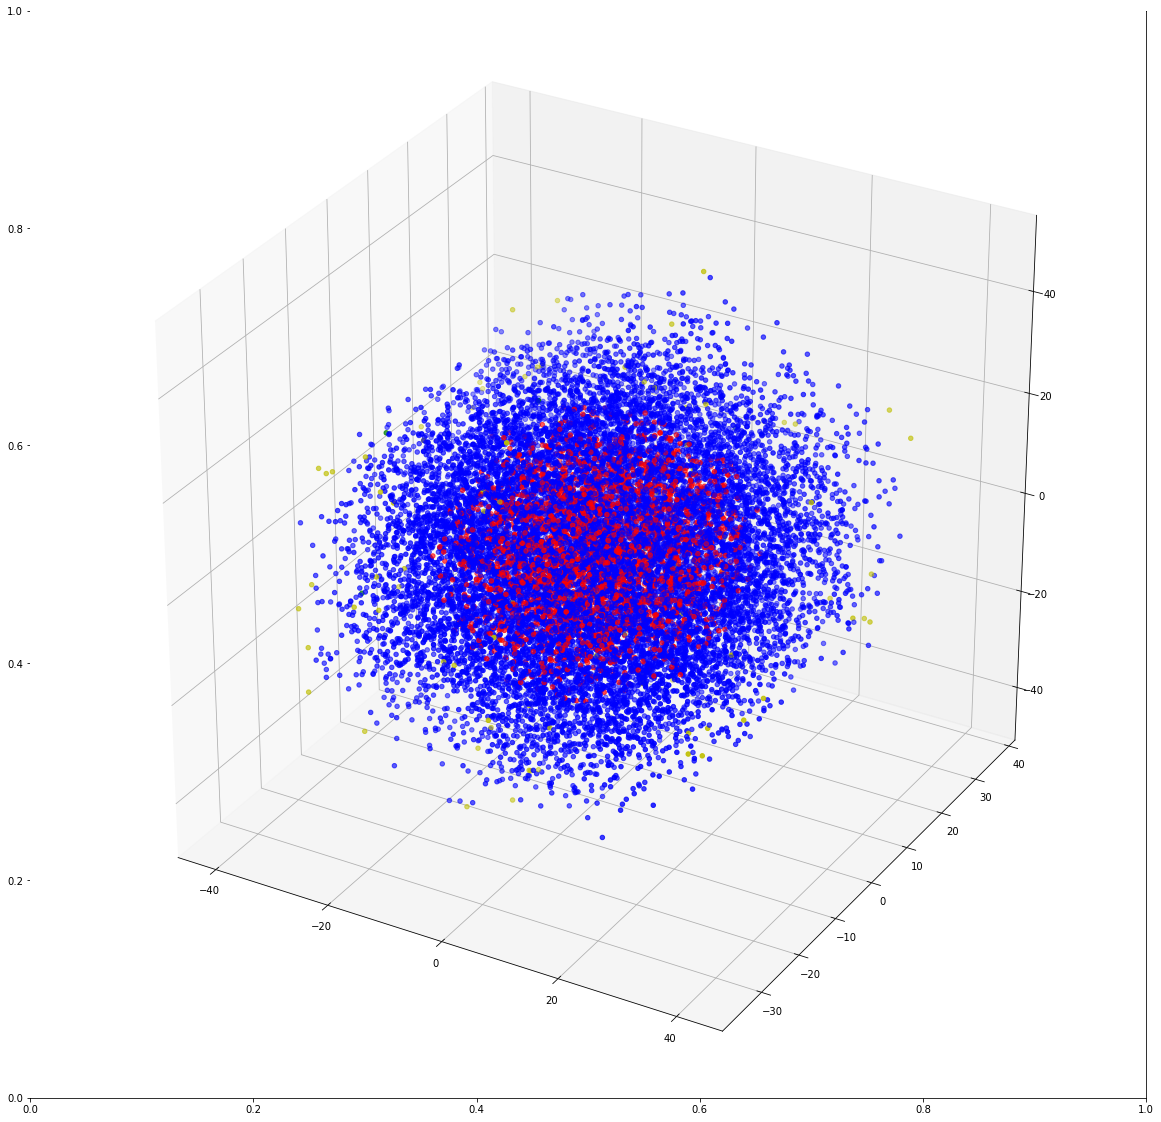

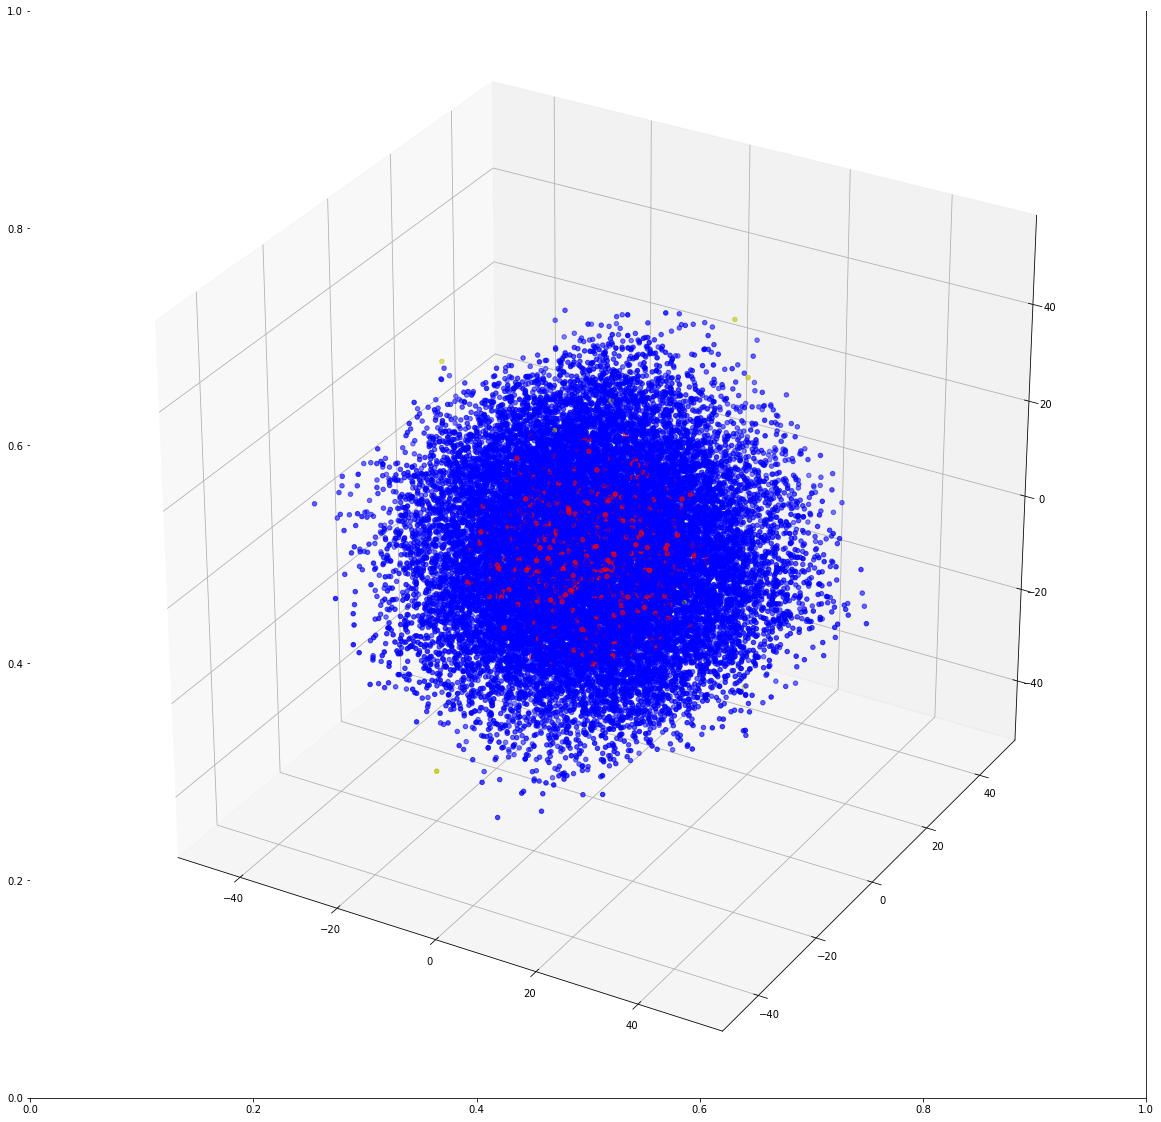

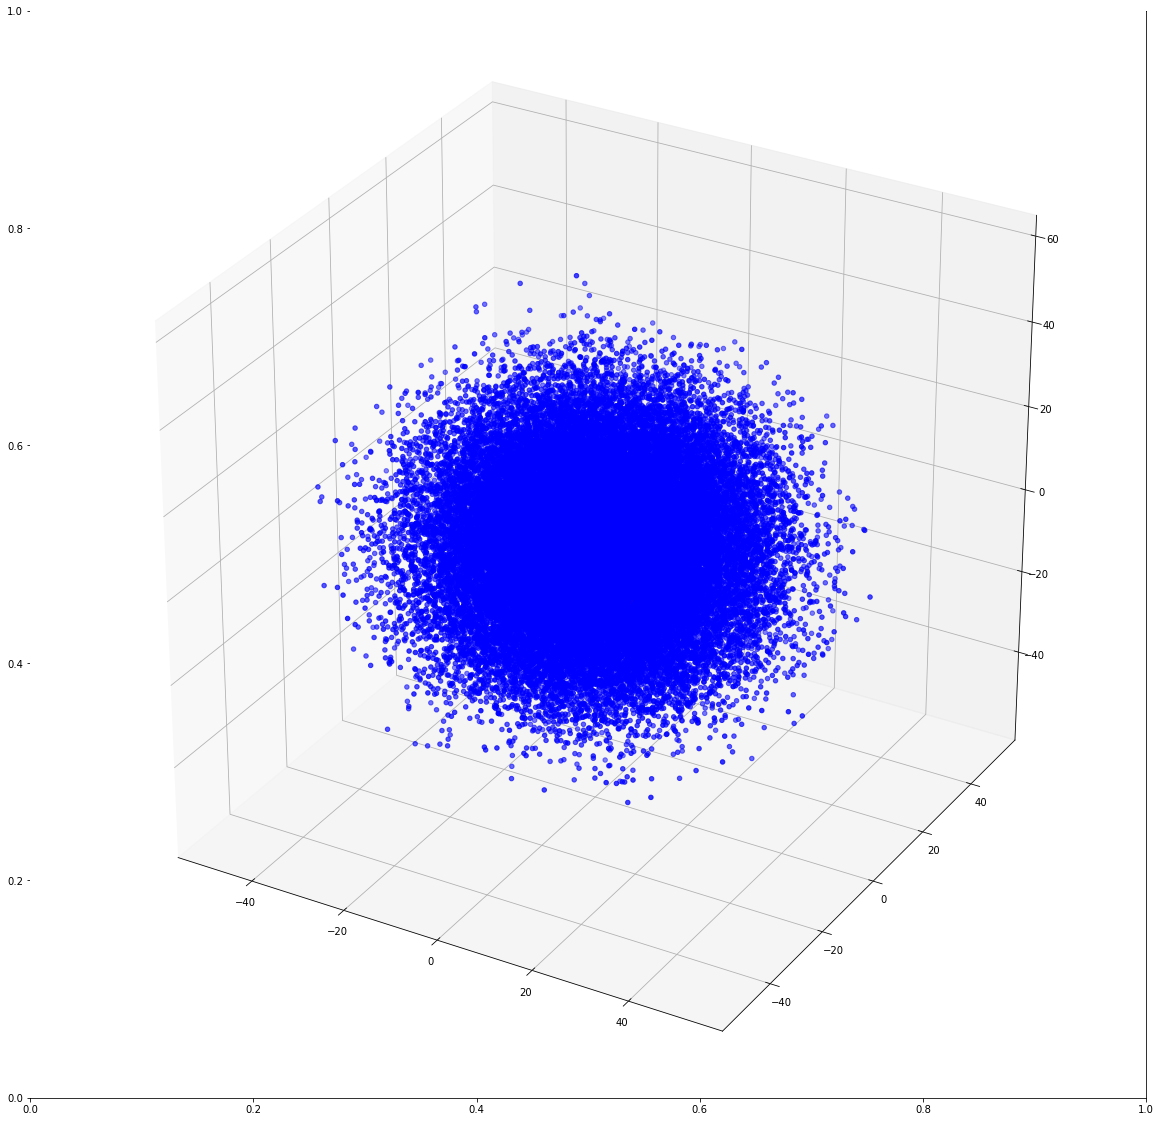

In [9]:
pca = PCA(n_components=3)
for d in dims:
    fig, ax = plt.subplots(figsize=(20,20))
    ax = fig.add_subplot(111, projection='3d')
    X,y = generate_points(d,50)
    pca.fit(X)
    X1 = pca.transform(X)
    ax.scatter(X1[:,0],X1[:,1],X1[:,2],c=color[y])
    plt.show()

Obserwacje analogiczne jak w przypadku płaszczyzny 2D.

# B

In [10]:
colors = np.array(['y','g','r','b'])
markers = np.array(['s', 'x', 'o', '^'])

In [11]:
yellow_count = 256
red_count = 256
blue_count = 256
green_count = 256

yellow_x_1 = np.random.normal(0, 4, yellow_count)* 3 
yellow_y_1 = np.random.normal(0, 1, yellow_count) + yellow_x_1/4
yellow_x_2 = np.random.normal(0, 4, yellow_count)* 3 + 20
yellow_y_2 = np.random.normal(0, 1, yellow_count) + yellow_x_2/4 + 20
yellow = np.concatenate((np.concatenate((yellow_x_1,yellow_x_2),axis=0).reshape(-1,1),np.concatenate((yellow_y_1,yellow_y_2),axis=0).reshape(-1,1)),axis=1)

green_x_1 = np.random.normal(0, 2, yellow_count)* 2 - 18
green_y_1 = np.random.normal(0, 2, yellow_count) + green_x_1 + 23
green_x_2 = np.random.normal(0, 2, yellow_count)* 2 + 37
green_y_2 = np.random.normal(0, 2, yellow_count) + green_x_2 - 18
green = np.concatenate((np.concatenate((green_x_1,green_x_2),axis=0).reshape(-1,1),np.concatenate((green_y_1,green_y_2),axis=0).reshape(-1,1)),axis=1)


red_x_1 = np.random.normal(0, 4, yellow_count)* 2 + 5
red_y_1 = np.random.normal(0, 1, yellow_count)+ red_x_1/4 + 4
red_x_2 = np.random.normal(0, 4, yellow_count)* 2 + 15
red_y_2 = np.random.normal(0, 1, yellow_count)+ red_x_2/4 + 16

red_x_3 = np.random.normal(0, 2, yellow_count)*2 - 7
red_y_3 = np.random.normal(0, 2, yellow_count) + red_x_3 + 15
red_x_4 = np.random.normal(0, 2, yellow_count)*2 + 28
red_y_4 = np.random.normal(0, 2, yellow_count) + red_x_4  - 10
red = np.concatenate((np.concatenate((red_x_1,red_x_2,red_x_3,red_x_4),axis=0).reshape(-1,1),np.concatenate((red_y_1,red_y_2,red_y_3,red_y_4),axis=0).reshape(-1,1)),axis=1)

blue_x = np.random.normal(0, 2, yellow_count)*2 + 10
blue_y= np.random.normal(0, 1, yellow_count)*2 + blue_x /4 + 10
blue = np.concatenate((blue_x.reshape(-1,1),blue_y.reshape(-1,1)),axis=1)

In [12]:
yellow_label = np.ones(yellow.shape[0]).reshape(-1,1) * 0
yellow = np.concatenate((yellow,yellow_label),axis=1)

green_label = np.ones(green.shape[0]).reshape(-1,1)
green = np.concatenate((green,green_label),axis=1)

red_label = np.ones(red.shape[0]).reshape(-1,1) * 2
red = np.concatenate((red,red_label),axis=1)

blue_label = np.ones(blue.shape[0]).reshape(-1,1) * 3
blue = np.concatenate((blue,blue_label),axis=1)

points_set = np.concatenate((yellow,green,red,blue))

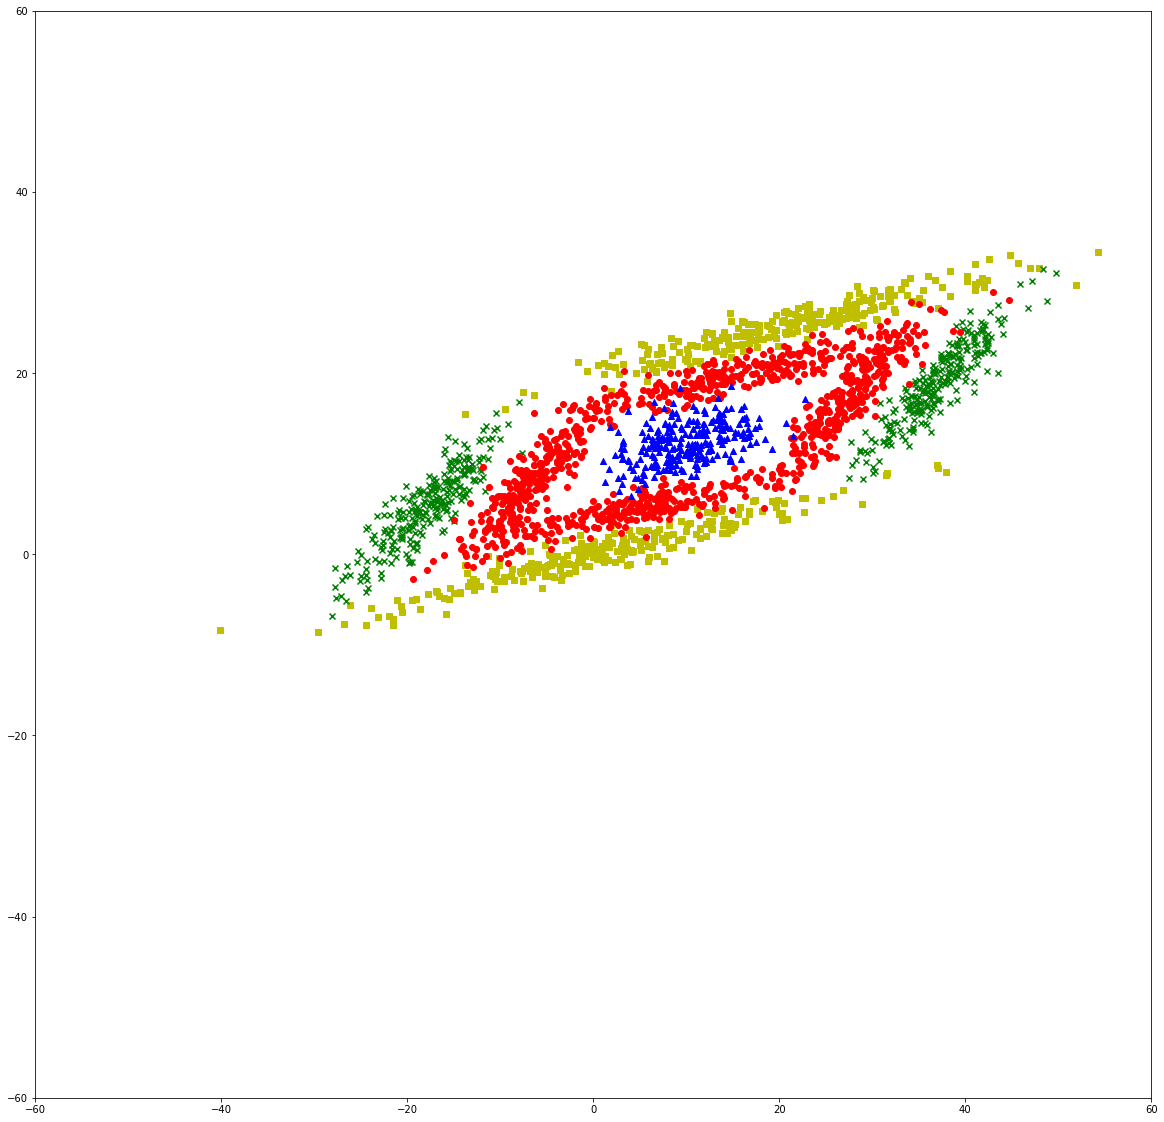

In [13]:
fig, ax = plt.subplots(figsize=(20,20))
plt.xlim(-60,60)
plt.ylim(-60,60)
for (x,y,c) in points_set:
    c=int(c)
    ax.scatter(x,y,c=colors[c],marker=markers[c])

Odtworzenie zniekształconych danych

In [14]:
X = points_set[:,:2]
Y = points_set[:,2].reshape(-1,1)
X.shape

(2304, 2)

In [15]:
pca = PCA(n_components=2)
pca.fit(X)
X1 = pca.transform(X)

default_data_ofset = pca.mean_

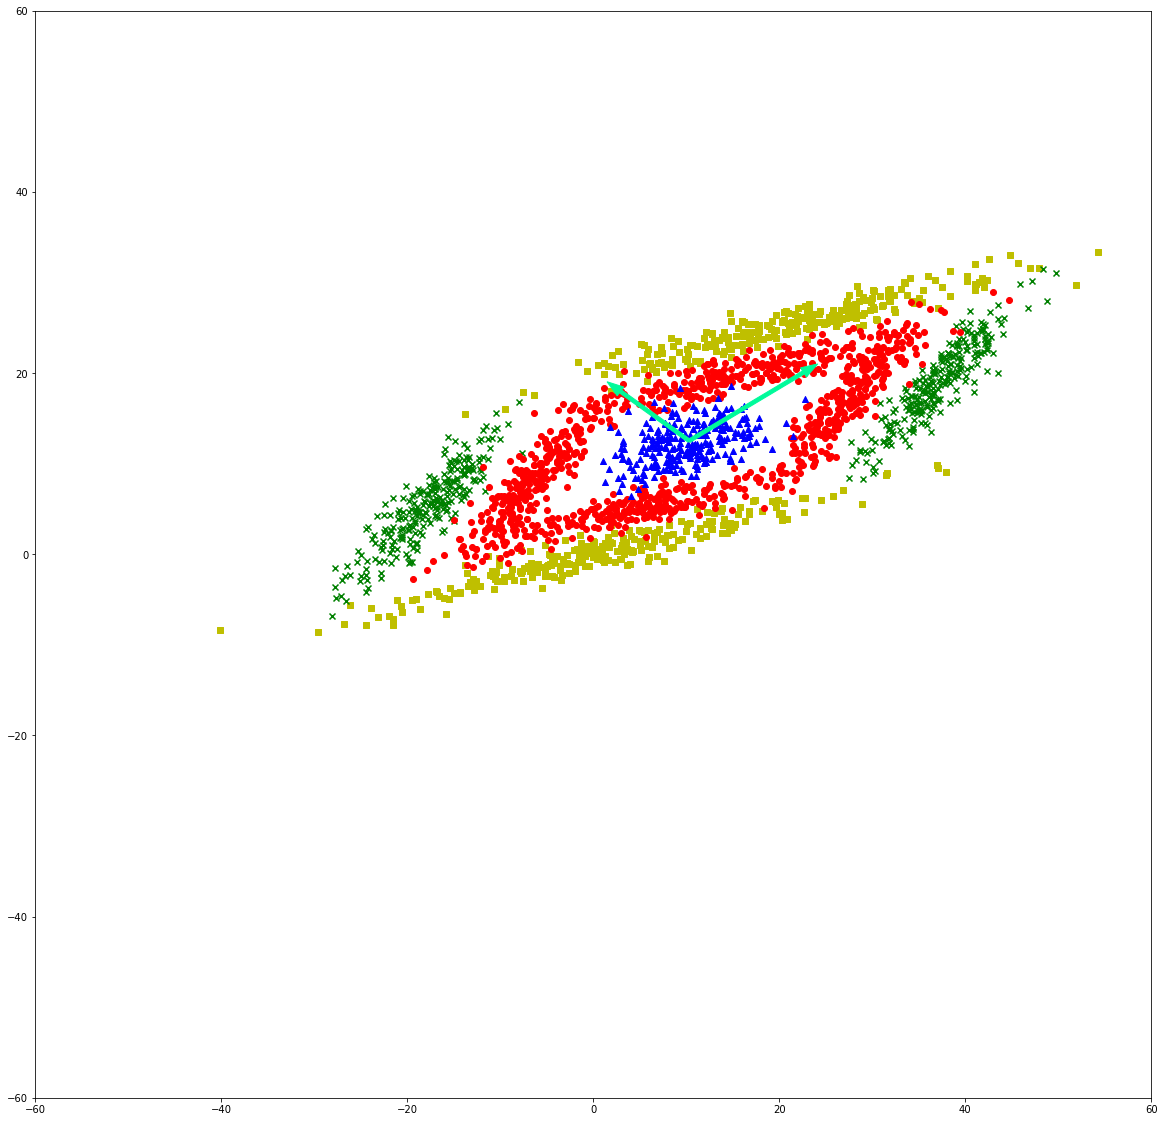

In [16]:
fig, ax = plt.subplots(figsize=(20,20))
plt.xlim(-60,60)
plt.ylim(-60,60)
origin = (0,0)
for (x,y,c) in points_set:
    c=int(c)
    ax.scatter(x,y,c=colors[c],marker=markers[c])
    
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * np.sqrt(length)
    end = pca.mean_ + v
    plt.arrow(*pca.mean_, *end, color='mediumspringgreen',width=0.4)

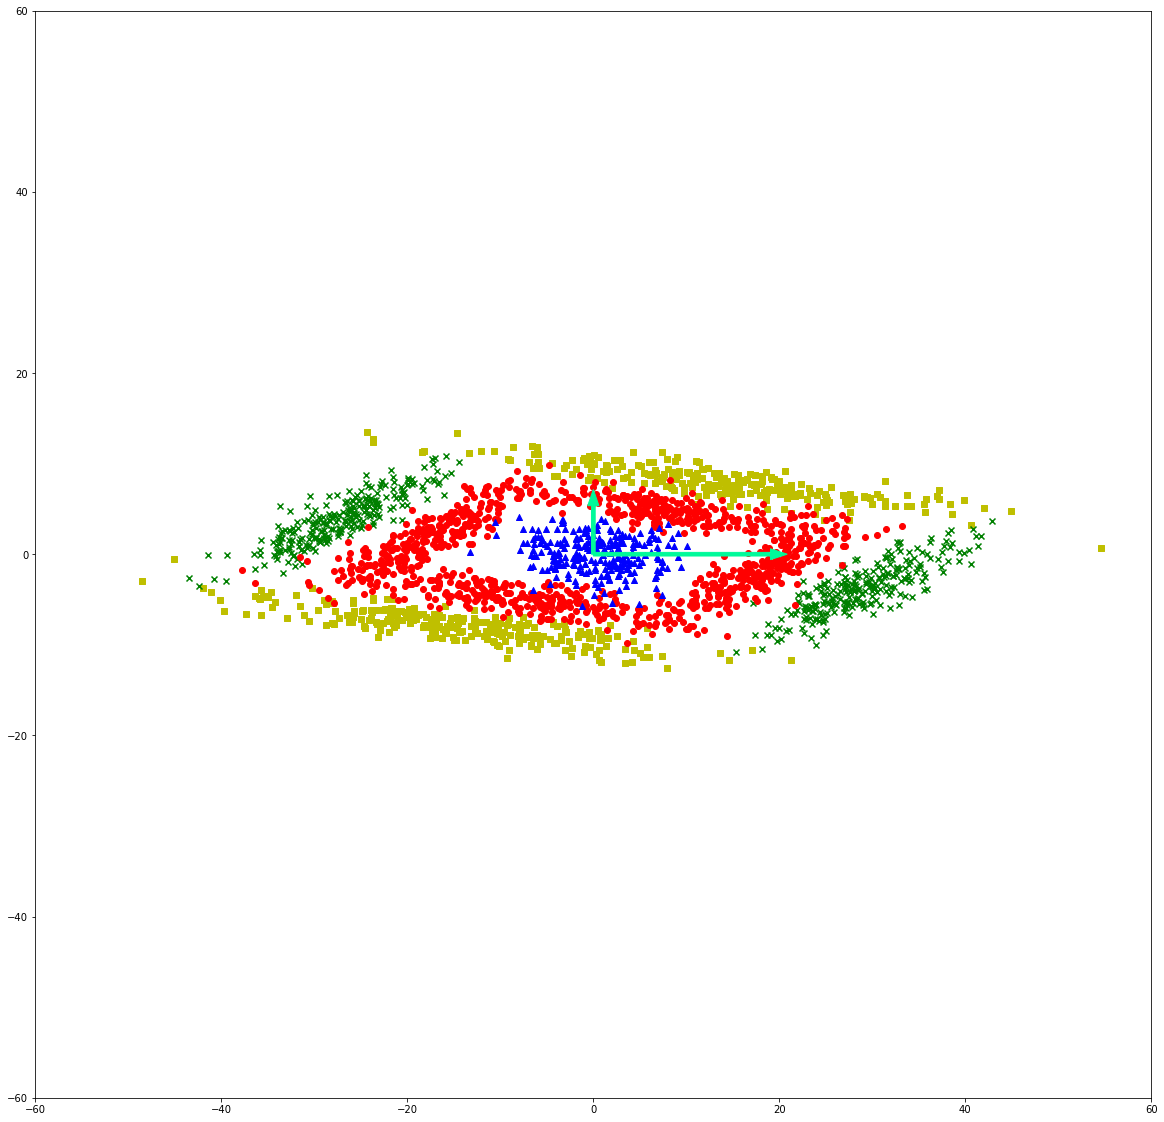

In [17]:
fig, ax = plt.subplots(figsize=(20,20))
plt.xlim(-60,60)
plt.ylim(-60,60)
for (x,y,c) in np.concatenate((X1,Y),axis=1):
    c=int(c)
    ax.scatter(x,y,c=colors[c],marker=markers[c])

pca.fit(X1)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * np.sqrt(length)
    end = pca.mean_ + v
    plt.arrow(*pca.mean_, *end, color='mediumspringgreen',width=0.4)

PCA nie doś że znalazło lepszą bazę to jeszcze wyśrodkowało dane

In [18]:
kpca = KernelPCA(n_components=2,kernel='cosine')
kpca.fit(X)
X2 = kpca.transform(X)

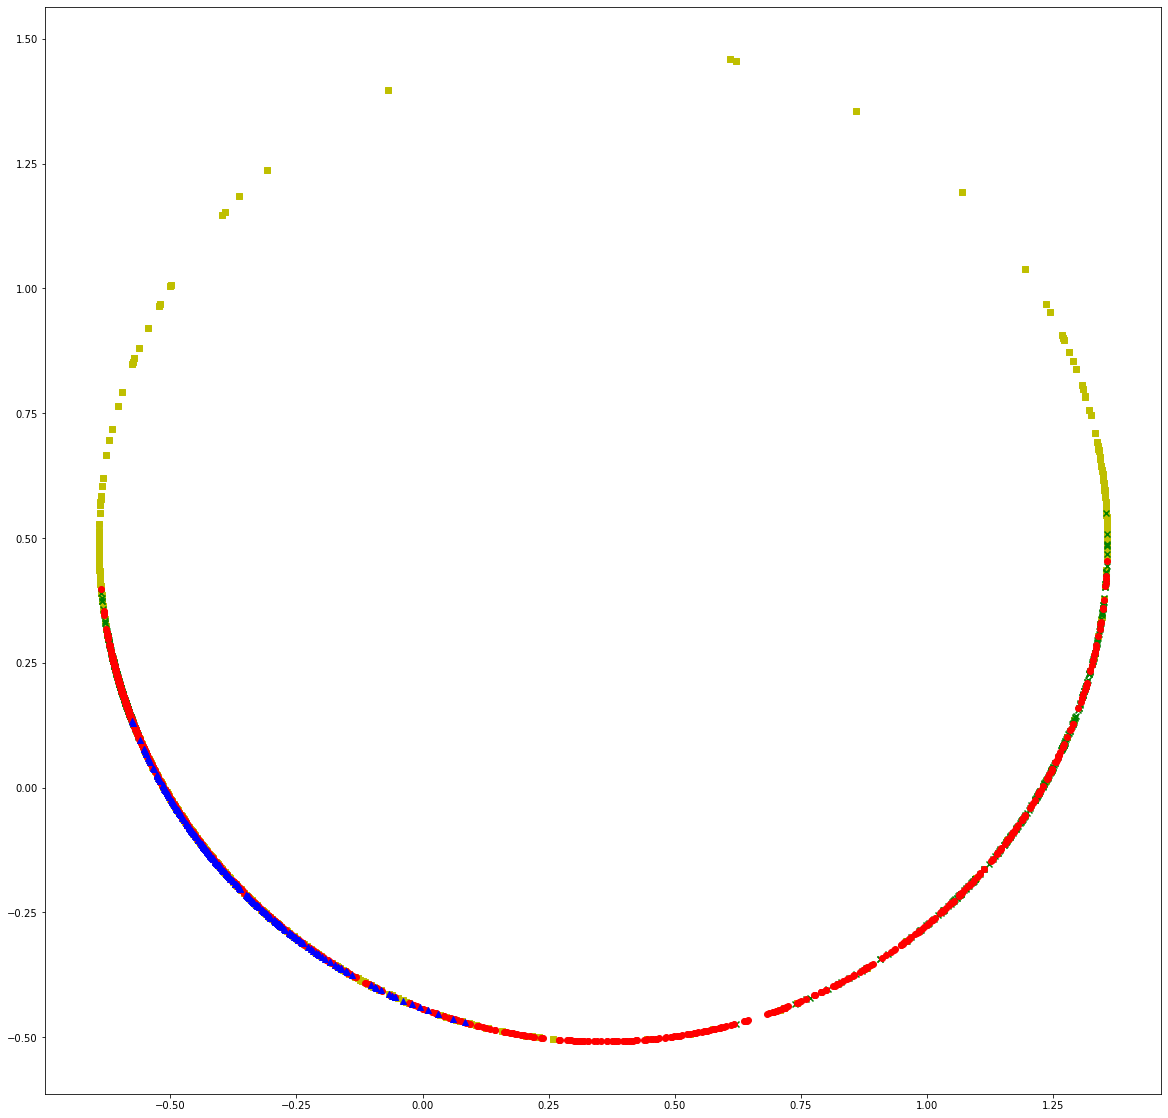

In [19]:
fig, ax = plt.subplots(figsize=(20,20))
for (x,y,c) in np.concatenate((X2,Y.reshape(-1,1)),axis=1):
    c=int(c)
    ax.scatter(x,y,c=colors[c],marker=markers[c])

Cosine KernelPCA dla niewyśrodkowanych danych

In [20]:
X_c = X - default_data_ofset
kpca.fit(X_c)
X2_1 = kpca.transform(X_c)
pca.mean_

array([1.81533029e-14, 1.42495969e-14])

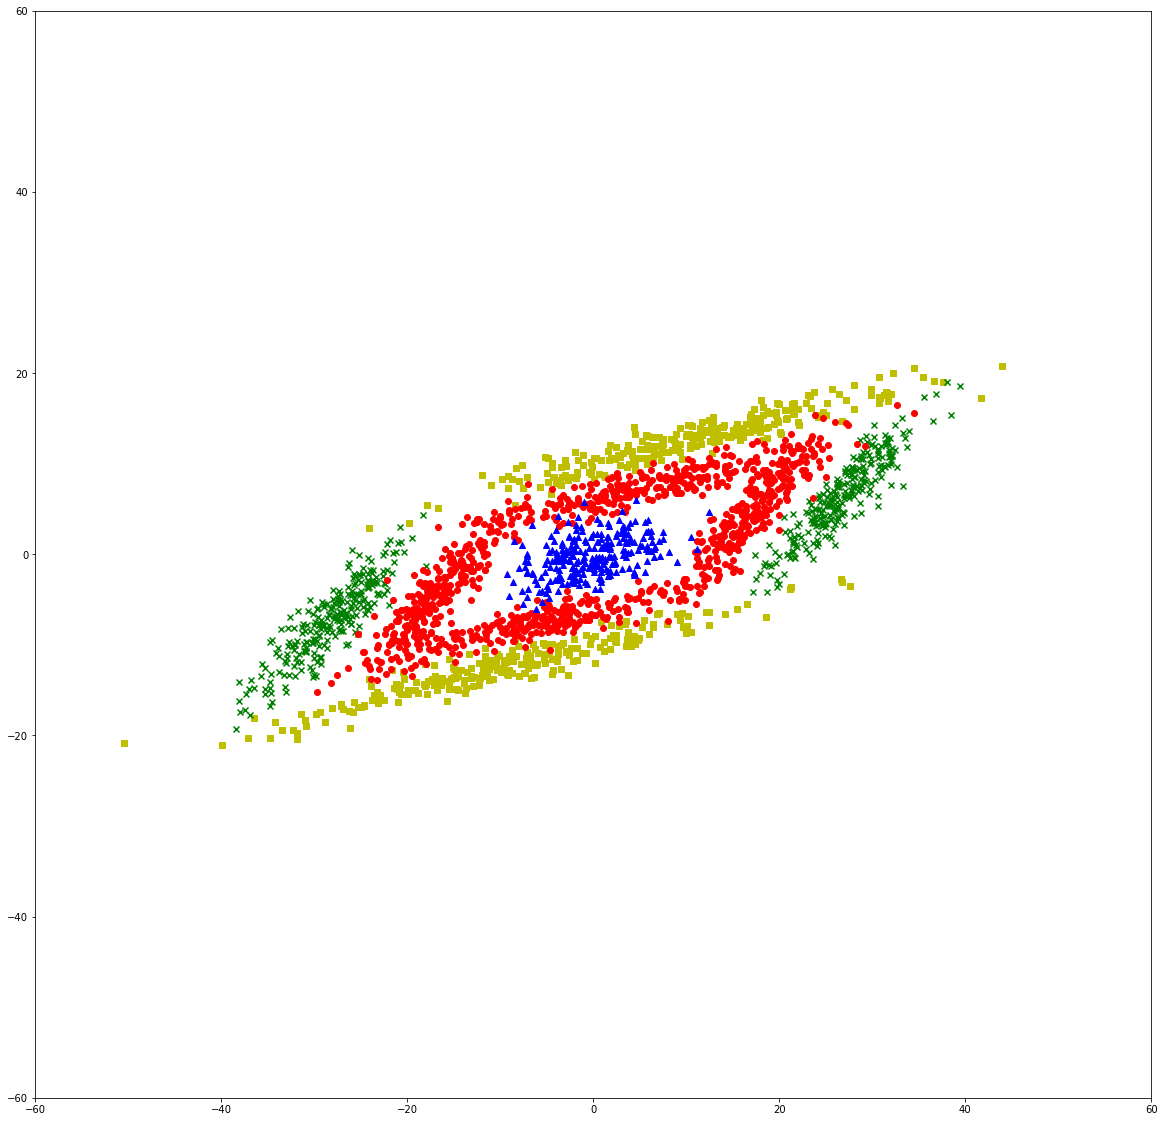

In [21]:
fig, ax = plt.subplots(figsize=(20,20))
plt.xlim(-60,60)
plt.ylim(-60,60)
for (x,y,c) in np.concatenate((X_c,Y),axis=1):
    c=int(c)
    ax.scatter(x,y,c=colors[c],marker=markers[c])

Wyśrodkowane dane

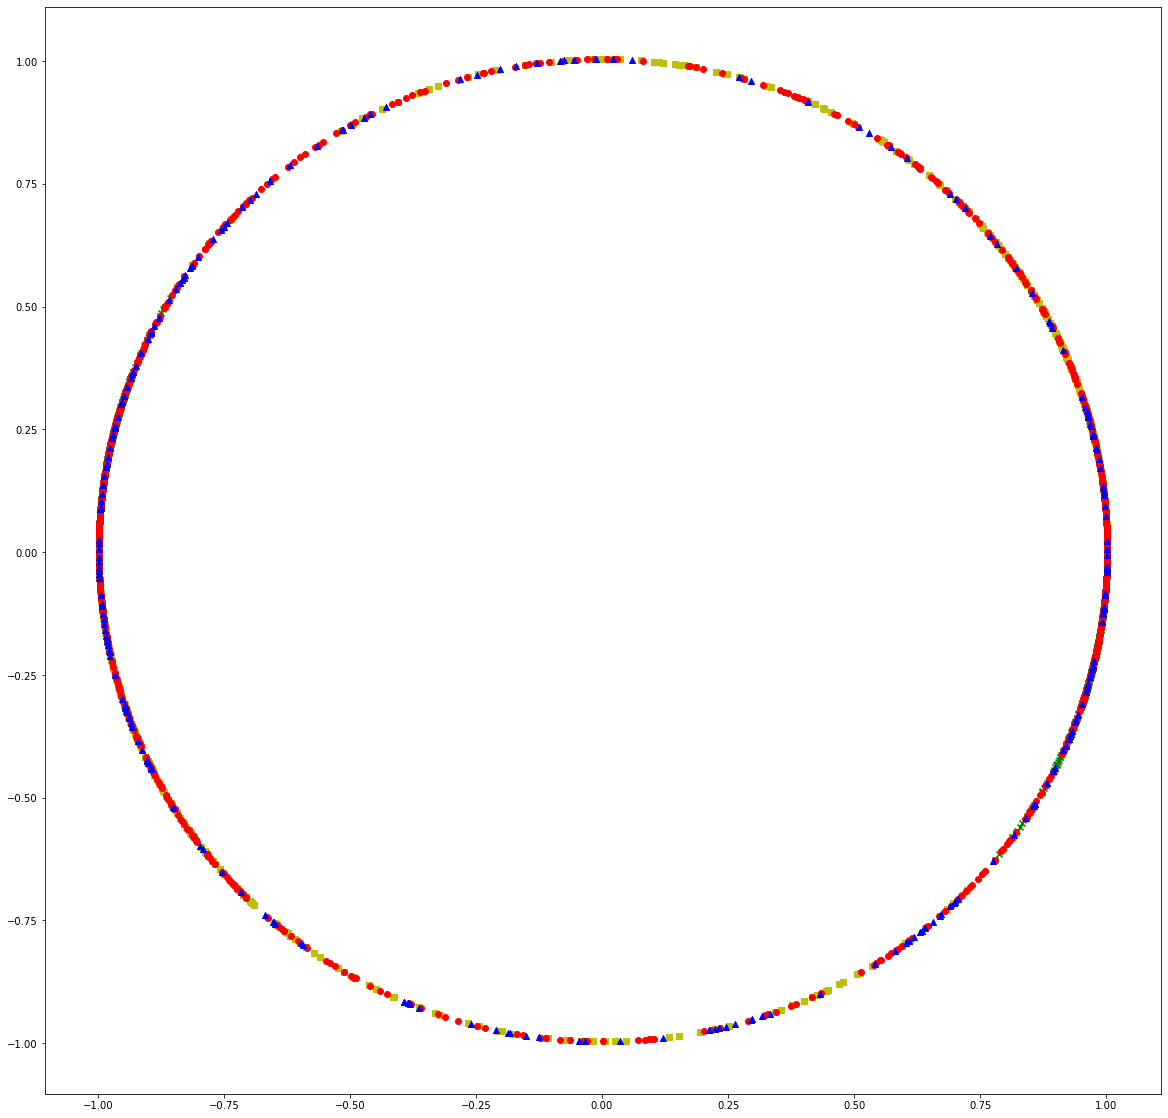

In [22]:
fig, ax = plt.subplots(figsize=(20,20))
for (x,y,c) in np.concatenate((X2_1,Y.reshape(-1,1)),axis=1):
    c=int(c)
    ax.scatter(x,y,c=colors[c],marker=markers[c])

Cosine KernelPCA dla wyśrodkowahych danych. Widać że rozłożenie danych na okręgu jest równomierne w przeciwieństwie do niewyśrodkowanych danych.

In [23]:
kpca = KernelPCA(n_components=2,kernel='rbf',gamma=0.00001)
kpca.fit(X_c)
X3 = kpca.transform(X)

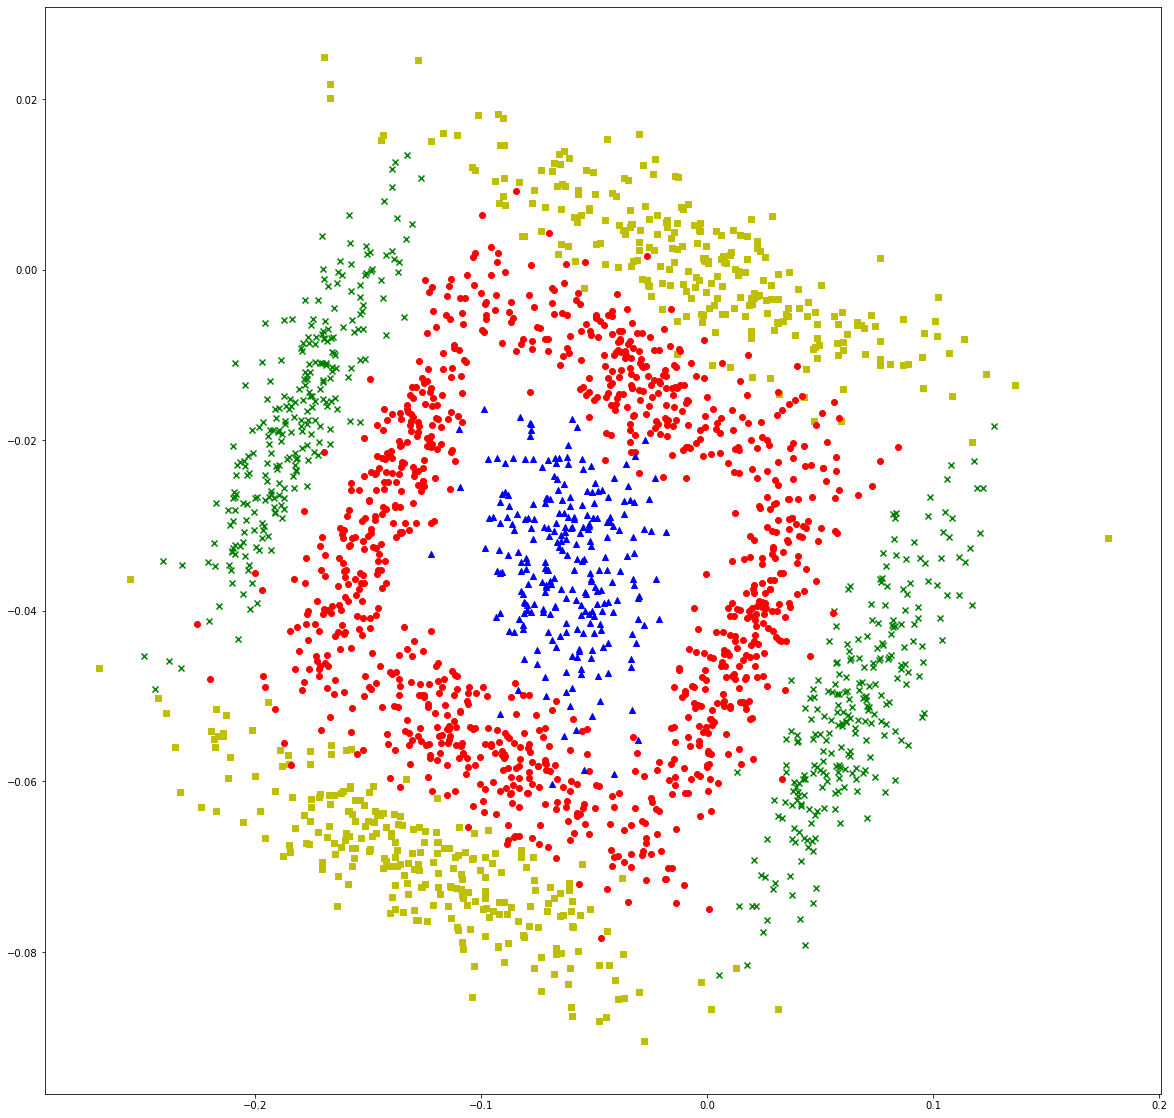

In [24]:
fig, ax = plt.subplots(figsize=(20,20))
for (x,y,c) in np.concatenate((X3,Y.reshape(-1,1)),axis=1):
    c=int(c)
    ax.scatter(x,y,c=colors[c],marker=markers[c])

In [25]:
kpca = KernelPCA(n_components=2,kernel='rbf',gamma=0.0008)
kpca.fit(X_c)
X3_1 = kpca.transform(X)

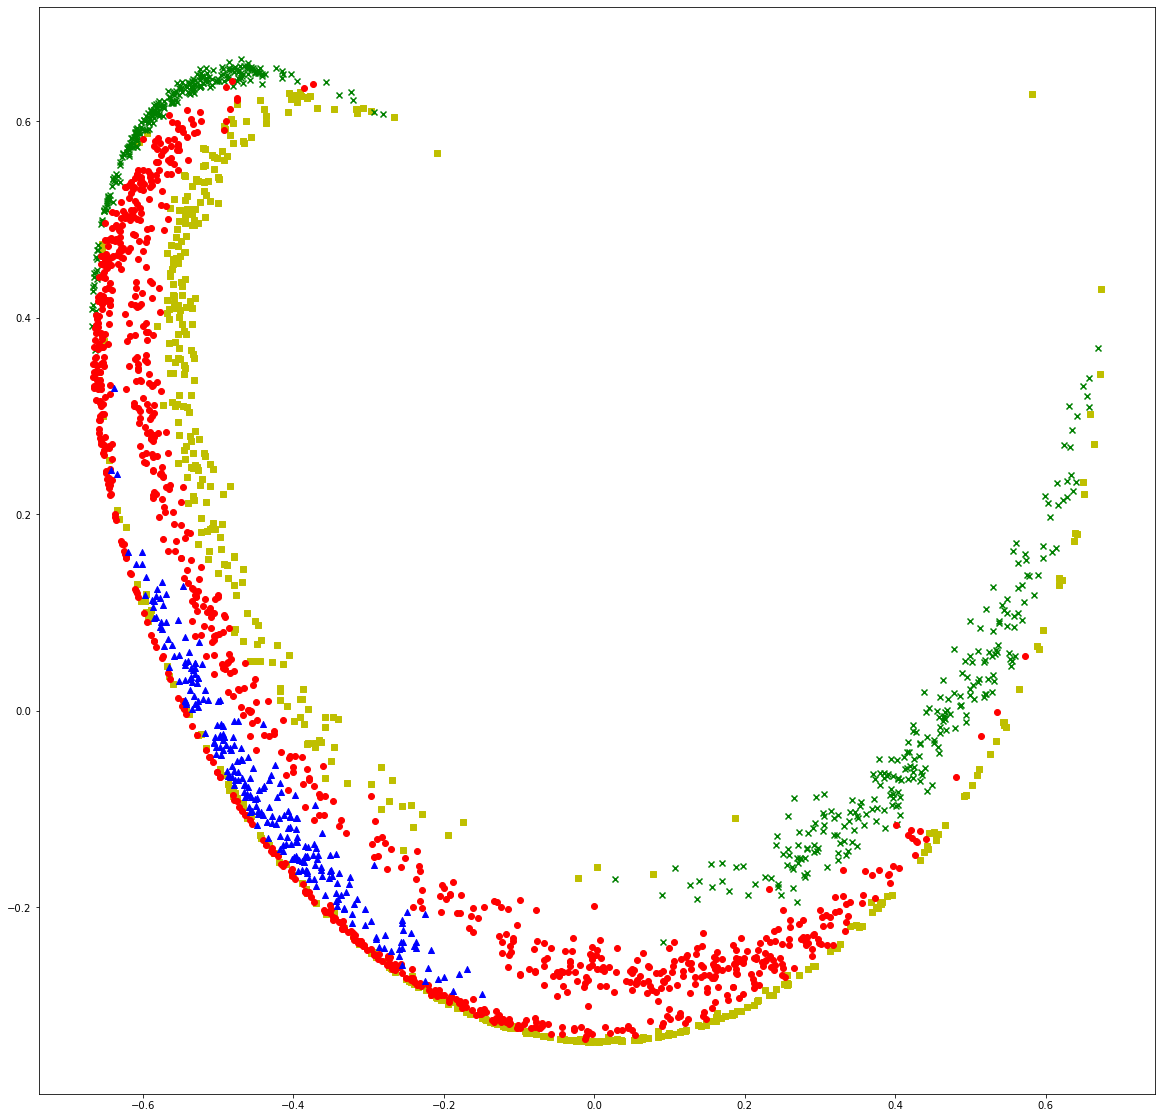

In [26]:
fig, ax = plt.subplots(figsize=(20,20))
for (x,y,c) in np.concatenate((X3_1,Y.reshape(-1,1)),axis=1):
    c=int(c)
    ax.scatter(x,y,c=colors[c],marker=markers[c])

RBF KernelPCA dla różnych wartości gammy daje bardzo różne wyniki